In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Each element in the pickle is an array with 10 entries. First 8 entries correspond to time intervals on  the rising curve of a pulse (event in the detector). 9th entry is the total energy of an event and 10th entry is a label, whether an event belongs to class 0 or class 1. Events from corresponding classes were saved in timeDiff_ER.pickle, timeDiff_NR.pickle pickle files. Aim of the analysis is to see if we can effectively cluster (unsupervised learning) events from two abovementioned classes. We test T-SNE dimention reduction algorithm to map 8-dimentional space into 2 dimentions and visualize the result. After that we test kMeans unsupervised learning algorithm to check how effectively it can discriminate events amongst two clasess.  

In [2]:
with open('timeDiff_ER.pickle', 'rb') as handle:
    ER = pickle.load(handle)

In [3]:
with open('timeDiff_NR.pickle', 'rb') as handle1:
    NR = pickle.load(handle1)

In [4]:
labels_test, inputs_test =[], []
        
samples = min(len(ER), len(NR))
random.shuffle(ER)
random.shuffle(NR)
#ER = ER[:samples]    #making data equal size
#NR = NR[:samples]
ER_NR_test = ER+NR
random.shuffle(ER_NR_test)

for i in range(len(ER_NR_test)):
    labels_test.append(ER_NR_test[i][-1])
    inputs_test.append(ER_NR_test[i][:-2])  #excude E and label
        
labels_test = np.array(labels_test)
inputs_test = np.array(inputs_test, dtype=np.float64)

scaler = StandardScaler()
inputs_test = scaler.fit_transform(inputs_test)

print("Number of Test samples: "+str(samples))

Number of Test samples: 62


In [5]:
#T-SNE
tsne = TSNE(n_components=2, verbose=1, random_state=2)
z = tsne.fit_transform(inputs_test)

/home/smalu/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/smalu/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 279 samples in 0.000s...
[t-SNE] Computed neighbors for 279 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 279 / 279
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.271744
[t-SNE] KL divergence after 1000 iterations: 0.695469


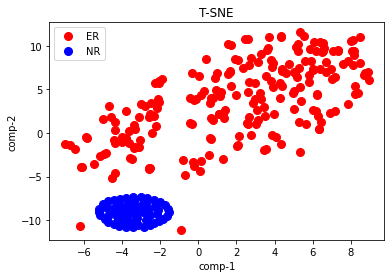

In [6]:
X1, Y1, X2, Y2, = [], [], [], []
for i in range(len(labels_test)):
    if labels_test[i] == 0:
        X1.append(z[i][0])
        Y1.append(z[i][1])
    if labels_test[i] == 1:
        X2.append(z[i][0])
        Y2.append(z[i][1])
        
X1 = np.array(X1)
Y1 = np.array(Y1)
X2 = np.array(X2)
Y2 = np.array(Y2)

plt.plot(X1, Y1, "ro",markersize=8, label="ER")
plt.plot(X2, Y2, "bo",markersize=8, label="NR")
plt.title("T-SNE")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()
plt.show()

In [7]:
#k-means algorithm 
kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)
kmeans.fit(z)

KMeans(init='random', n_clusters=2, random_state=42)

In [14]:
total = 0
count = 0
for i in range(len(labels_test)):
    if kmeans.labels_[i] == labels_test[i]:
        count+=1
    total+=1

pct = count/total
if pct<.5:
    pct = round(1-pct,2)
else:
    pct = round(pct,2)
print("accuracy: "+str(pct))

accuracy: 0.82


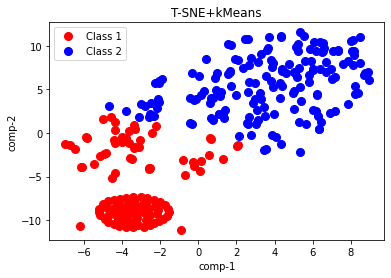

In [16]:
X1, Y1, X2, Y2, = [], [], [], []
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        X1.append(z[i][0])
        Y1.append(z[i][1])
    if kmeans.labels_[i] == 1:
        X2.append(z[i][0])
        Y2.append(z[i][1])
        
X1 = np.array(X1)
Y1 = np.array(Y1)
X2 = np.array(X2)
Y2 = np.array(Y2)

plt.plot(X1, Y1, "ro",markersize=8, label="Class 1")
plt.plot(X2, Y2, "bo",markersize=8, label="Class 2")
plt.title("T-SNE+kMeans")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()
plt.show()